In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
font = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 22} 
import matplotlib
matplotlib.rc('font', **font) 
import matplotlib.pyplot as plt
import pylab

from power_spectrum import Lens

In [40]:
abell = Lens('data/abell2744_mass_density.fits')
kbin_centers, power = abell.compute_power_spectrum()
theta_bin_centers = 1.0/kbin_centers

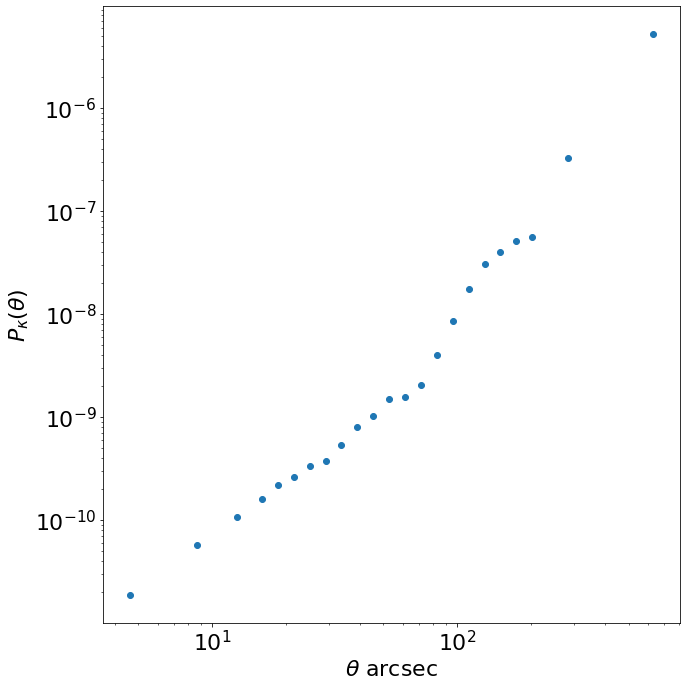

In [41]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.loglog(theta_bin_centers, power, 'o')
ax.set_xlabel(r'$\theta$ arcsec')
ax.set_ylabel(r'$P_\kappa(\theta) $')
plt.tight_layout()
plt.savefig('abell2744_power_theta.jpeg')
pylab.show()

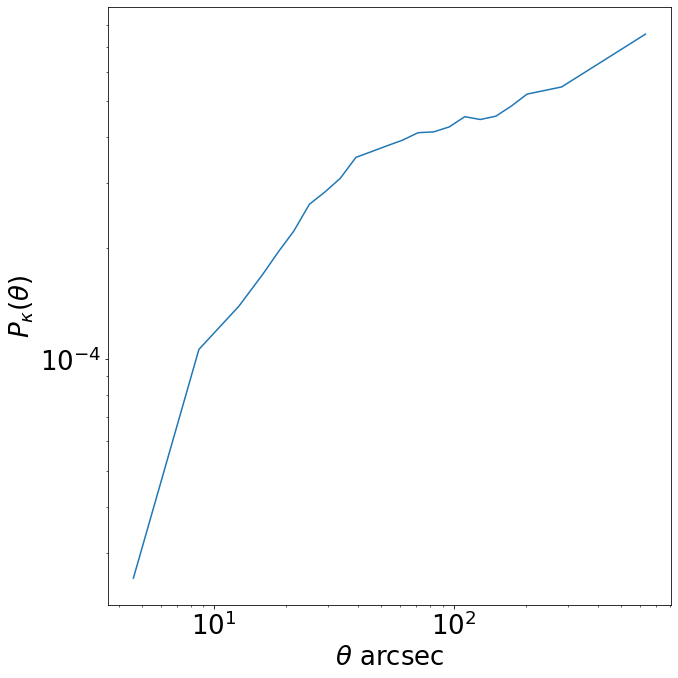

In [32]:
fig = plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.plot(theta_bin_centers, power)
plt.xlabel(r'$\theta$ arcsec')
plt.ylabel(r'$P_\kappa(\theta) $')
plt.tight_layout()
plt.show()